# Labo 4 : ACP sur des images

## Tâche 1

a. Que contient la structure de données retournée par datasets.fetch_olivetti_faces() ?

In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
print(faces.DESCR)

print("shape of faces:")

faces.pop('DESCR')

for i in faces.keys():
    print(i, faces.get(i).shape)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

l'objet ``faces`` contient:
1. `data` : 400 listes de 4096 points de 0 à 1 représentant les pixels des images des personnes
2. `images` : 400 listes à deux dimensions de 64x64 points de 0 à 1 représentant les pixels des images des personnes
3. `target` : 400 identifiants qui indiquent à quelles personnes les images correspondent.


b. Combien de personnes sont représentées ? Combien d’images par personne ?

La description nous indique que les images des personnes appartiennent à 40 personnes différentes, notées de 1 à 39 dans l'attribut `target`.
Il y a donc 10 images par personne.

c. Quelle est la taille des images ? Comment sont-elles codées ? Y a-t-il une duplication ?

Dans `data`, c'est un vecteur de points de 0 à 1, et dans `images` c'est un vecteur bi-dimensionnel de 64x64 points.

Les valeurs des pixels sont les mêmes dans `data` et `images`, simplement organisées d'une façon différente. Il y a donc bien duplication de données.

d. Veuillez afficher une image extraite des données.

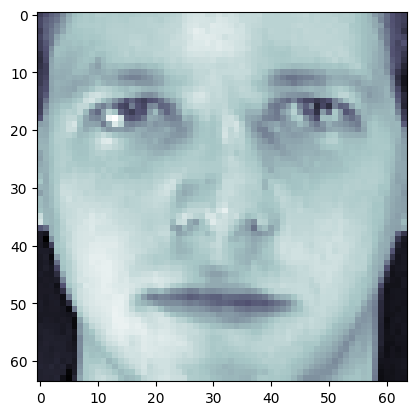

In [2]:
from matplotlib import pyplot as plt

plt.imshow(faces.images[0], cmap=plt.cm.bone)

## Tâche 2



In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    faces.data,
    faces.target,
    test_size=0.2,
    stratify=faces.target,
    random_state=42
)

print("Dimensions des jeux:")
print("Train: ",x_train.shape)
print("Test: ",x_test.shape)

Dimensions des jeux:
Train:  (320, 4096)
Test:  (80, 4096)


## Tâche 3

Score d'accuracy pour le classifieur 'KNN': 0.7375
Score d'accuracy pour le classifieur 'Logistic Regression': 0.975
Score d'accuracy pour le classifieur 'SVM': 0.975
{'KNN': {'object': KNeighborsClassifier(metric='cosine'), 'accuracy': 0.7375}, 'Logistic Regression': {'object': LogisticRegression(solver='liblinear'), 'accuracy': 0.975}, 'SVM': {'object': SVC(C=1, kernel='linear'), 'accuracy': 0.975}}


Text(0.5, 1.0, 'Comparaison des 3 classifieurs sans ACP')

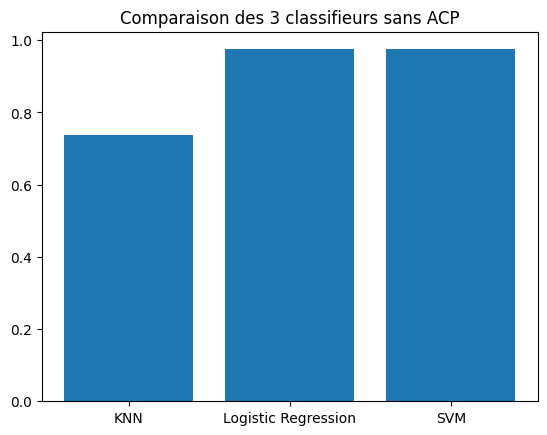

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine')},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear')},
    'SVM': {"object": SVC(C=1, kernel="linear")}}

for name, classifier in classifiers.items():
    classifier["object"].fit(x_train, y_train)
    y_pred = classifier["object"].predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Score d'accuracy pour le classifieur '{name}': {acc}")
    classifier["accuracy"] = acc

print(classifiers)
plt.bar(classifiers.keys(), [v["accuracy"] for v in classifiers.values()])
plt.title("Comparaison des 3 classifieurs sans ACP")

## Tâche 4

Décomposition en 150 PCA
Dimensions des eigenfaces:
(150, 4096)
Visualisation des 30 premières eigenfaces
Réduction de dimension des jeux de train et test
Dimensions des jeux réduits de dimension pour ACP:
Nouvelle dimension du jeu de train:  (320, 150)
Nouvelle dimension du jeu de test:  (80, 150)


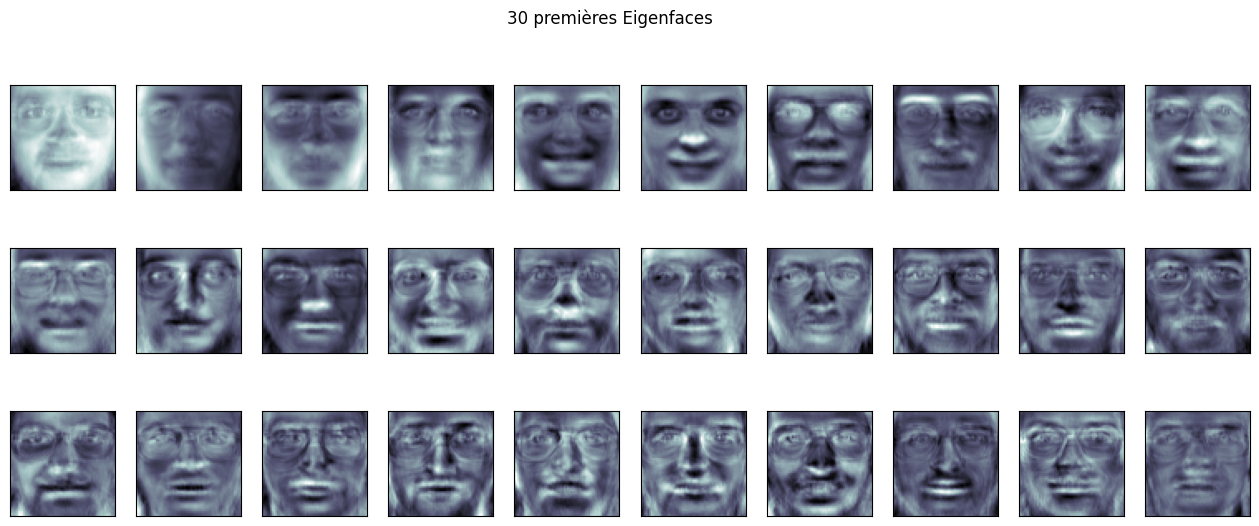

In [10]:
from sklearn import decomposition

print("Décomposition en 150 PCA")

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(x_train)

print("Dimensions des eigenfaces:")
print(pca.components_.shape)

print("Visualisation des 30 premières eigenfaces")
fig = plt.figure(figsize=(16, 6))
fig.suptitle('30 premières Eigenfaces')
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

print("Réduction de dimension des jeux de train et test")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("Dimensions des jeux réduits de dimension pour ACP:")
print("Nouvelle dimension du jeu de train: ", x_train_pca.shape)
print("Nouvelle dimension du jeu de test: ", x_test_pca.shape)



> Devez-vous centrer les données avant d’appliquer l’ACP ?

Non, car selon la documentation de sklearn, PCA applique automatiquement un centrage avant d'appliquer la redimension.

### Visualisation d'ACP à différents nombres de PCA

#### Sur les données d'entraînement

25
50
75
100
125
150


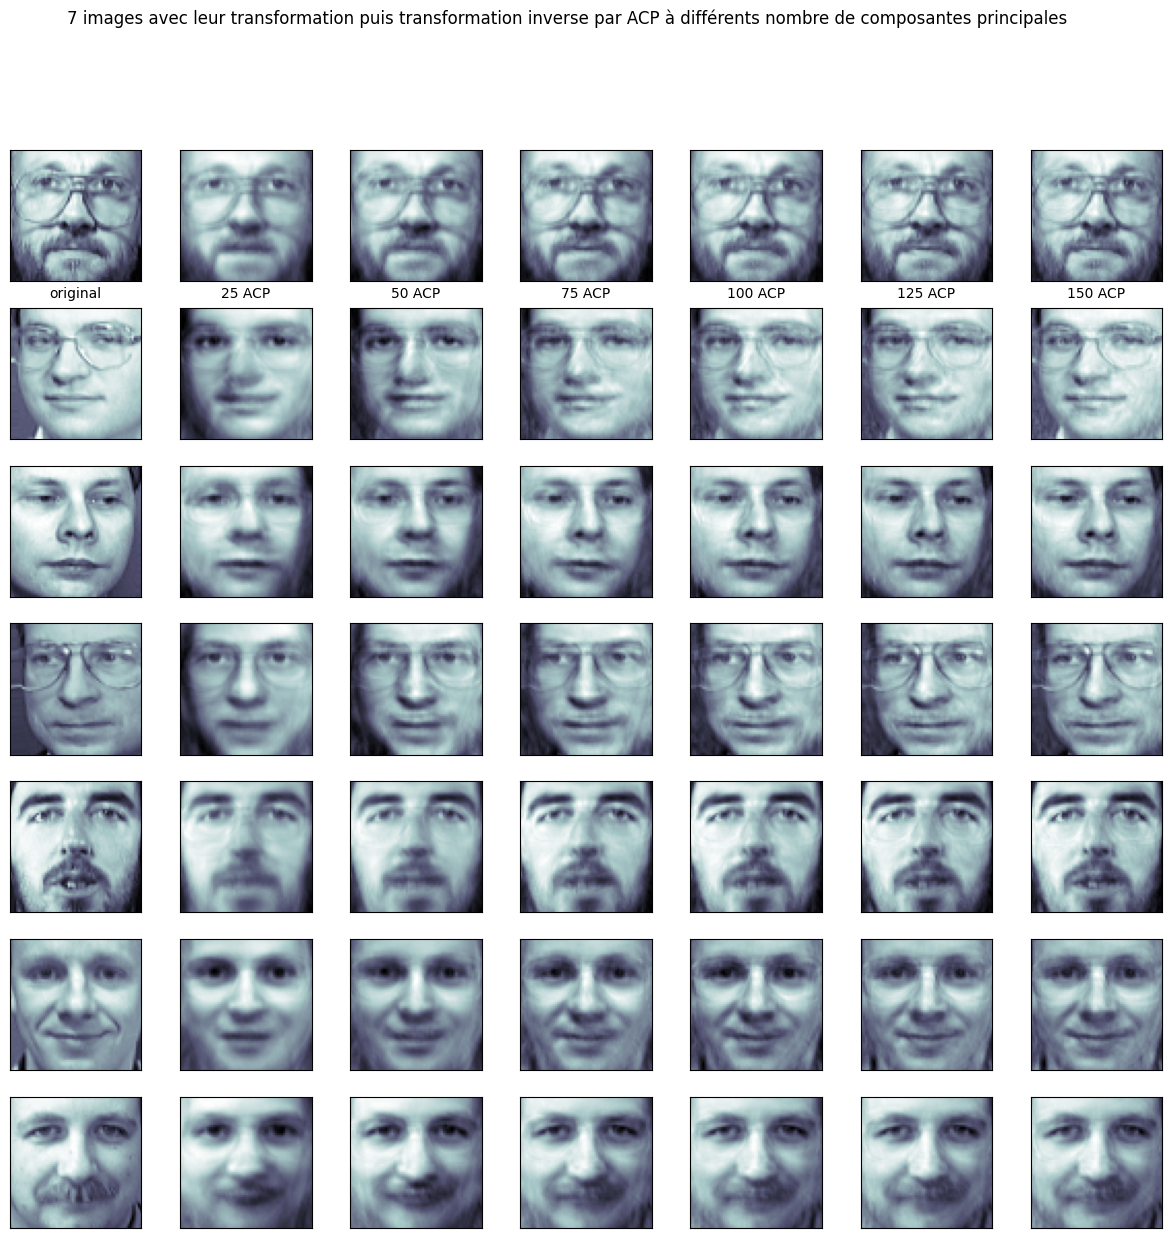

In [12]:
pcanb = 6
facenb = 7

fig = plt.figure(figsize=((pcanb-1)*3, facenb*2))
gs = fig.add_gridspec(facenb, 1)
fig.suptitle(str(facenb) + " images avec leur transformation puis transformation inverse par ACP à différents nombre de composantes principales")
gss = []

for i in range(pcanb):
    featNb = (i+1)*25
    print(featNb)

    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
    train_pca = pca.transform(x_train)
    train_invert_pca = pca.inverse_transform(train_pca)

    for k in range(facenb):
        if (i == 0):
            gss.append(gs[k].subgridspec(1, pcanb+1))

            ax = fig.add_subplot(gss[k][0], xticks=[], yticks=[], xlabel='original' if k == 0  else None)
            ax.imshow(x_train[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)
            
        ax = fig.add_subplot(gss[k][i+1], xticks=[], yticks=[], xlabel=str(featNb) + ' ACP' if k == 0  else None)
        ax.imshow(train_invert_pca[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)

#### Sur les données de test

25
50
75
100
125
150


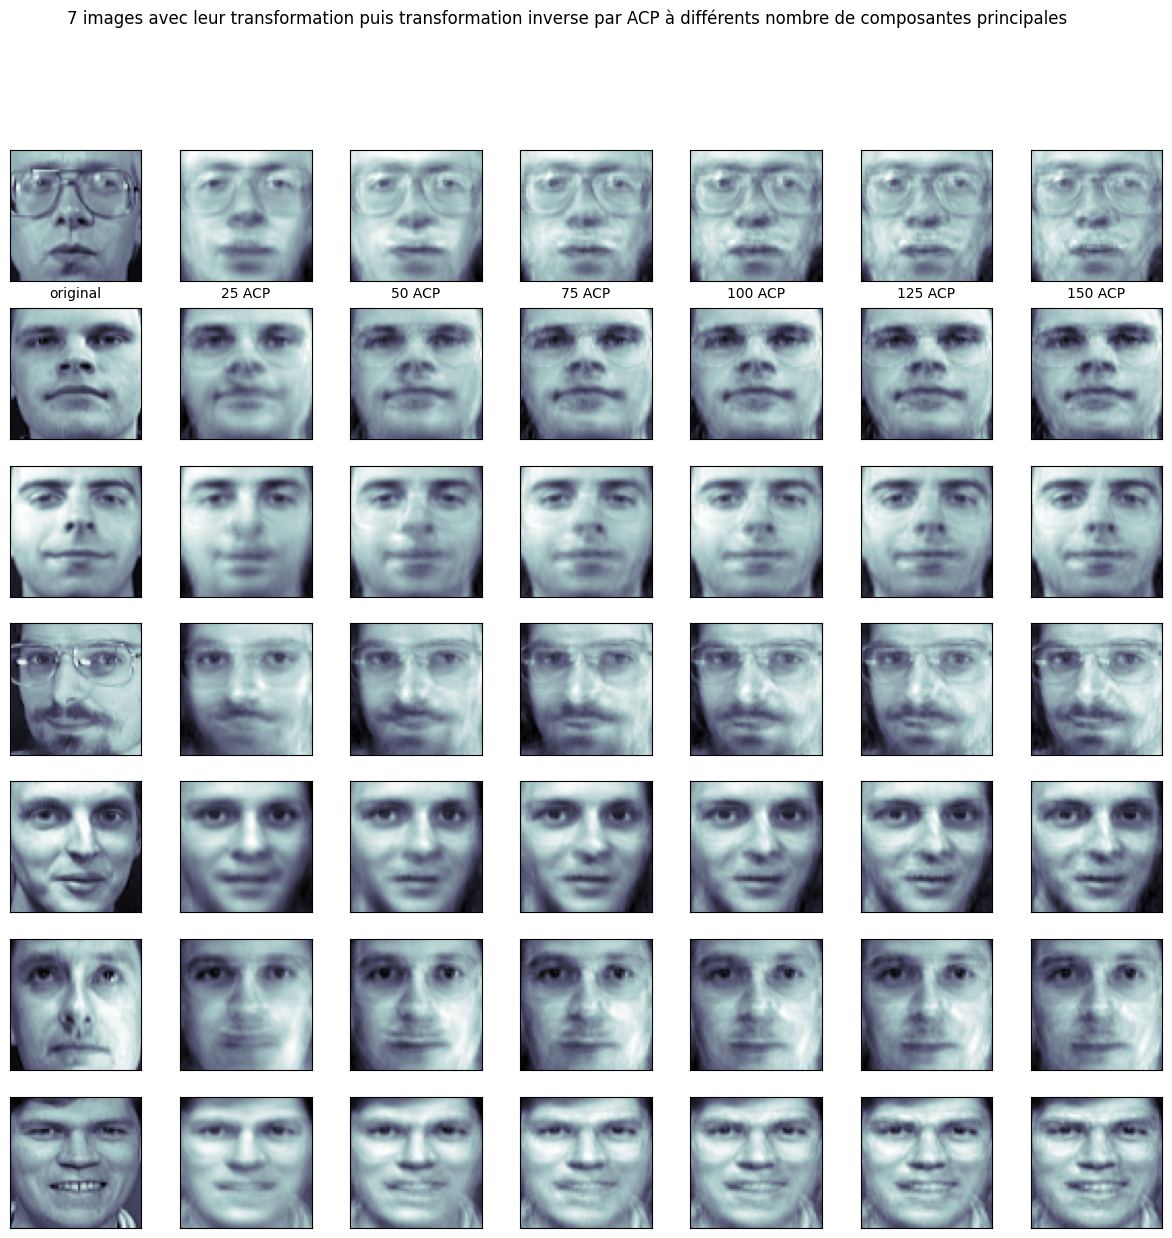

In [13]:
pcanb = 6
facenb = 7

fig = plt.figure(figsize=((pcanb-1)*3, facenb*2))
gs = fig.add_gridspec(facenb, 1)
fig.suptitle(str(facenb) + " images avec leur transformation puis transformation inverse par ACP à différents nombre de composantes principales")
gss = []

for i in range(pcanb):

    featNb = (i+1)*25
    print(featNb)

    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
    test_pca = pca.transform(x_test)
    test_invert_pca = pca.inverse_transform(test_pca)

    for k in range(facenb):
        if(i == 0):
            gss.append(gs[k].subgridspec(1, pcanb+1))

            ax = fig.add_subplot(gss[k][0], xticks=[], yticks=[], xlabel='original' if k == 0  else None)
            ax.imshow(x_test[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)
            
        ax = fig.add_subplot(gss[k][i+1], xticks=[], yticks=[], xlabel=str(featNb) + ' ACP' if k == 0  else None)
        ax.imshow(test_invert_pca[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)

On peut voir la qualité de la conservation des propriétés de chaque image après la réduction dimensionnelle ACP,
Si on applique ACP sur le dataset de train, on arrive assez vite (~100 ACP) à une reproduction presque parfaite de l'image originale
si on applique ACP sur le dataset de test avec 150 composantes principales, on a arrive à un niveau détail à peu près satisfaisant, et un nombre plus élevé de features ne change quasiment rien au résultat

## Tâche 5

Score d'accuracy du classifier 'KNN': 0.95
Score d'accuracy du classifier 'SVM': 0.9875
Score d'accuracy du classifier 'Logistic Regression': 0.9875
{'KNN': {'object': KNeighborsClassifier(metric='cosine'), 'accuracy': 0.95}, 'SVM': {'object': SVC(C=1, kernel='linear'), 'accuracy': 0.9875}, 'Logistic Regression': {'object': LogisticRegression(solver='liblinear'), 'accuracy': 0.9875}}


Text(0.5, 1.0, 'Comparaison des 3 classifiers avec ACP(150 feats.)')

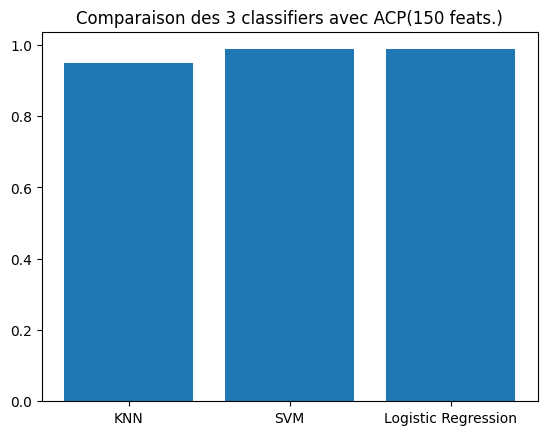

In [15]:
classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine')},
    'SVM': {"object": SVC(C=1, kernel="linear")},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear')}}

for name, classifier in classifiers.items():
    classifier["object"].fit(x_train_pca, y_train)
    y_pred = classifier["object"].predict(x_test_pca)

    acc = accuracy_score(y_test, y_pred)

    print(f"Score d'accuracy du classifier '{name}': {acc}")
    classifier["accuracy"] = acc

print(classifiers)
plt.bar(classifiers.keys(), [v["accuracy"] for v in classifiers.values()])
plt.title("Comparaison des 3 classifiers avec ACP(150 feats.)")

## Tâche 6

In [16]:
classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine'), "accuracy": []},
    'SVM': {"object": SVC(C=1, kernel="linear"), "accuracy": []},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear'), "accuracy": []}}

for i in range(15):
    featNb = (i+1)*10
    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
        
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    for name, classifier in classifiers.items():
        classifier["object"].fit(x_train_pca, y_train)
        y_pred = classifier["object"].predict(x_test_pca)

        acc = accuracy_score(y_test, y_pred)

        classifier["accuracy"].append(acc)

[0.7625, 0.8625, 0.9, 0.8875, 0.9375, 0.95, 0.9375, 0.9375, 0.925, 0.9375, 0.925, 0.925, 0.925, 0.9625, 0.95]
[0.925, 0.95, 0.95, 0.975, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]
[0.7875, 0.9, 0.9375, 0.925, 0.975, 0.9875, 0.975, 0.975, 0.975, 0.975, 0.975, 0.9875, 0.975, 0.9875, 0.9875]


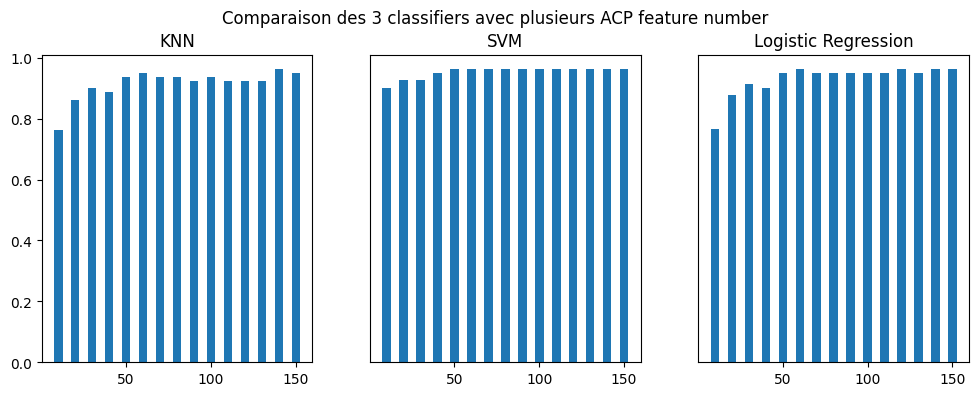

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle("Comparaison des 3 classifiers avec plusieurs ACP feature number")
plt.tight_layout()

for i, (name, classifier) in enumerate(classifiers.items()):
    print(classifier["accuracy"])
    axs[i].bar(
        [(i + 1) * 10 for i in range(len(classifier["accuracy"]))],
        [v for v in classifier["accuracy"]],
        width=5
    )

    axs[i].set_title(name)

    if i > 0:
        axs[i].set_yticks([]) 

In [19]:
import numpy as np

for (name, classifier) in classifiers.items():
    print(f"Meilleur nombre de composantes principales pour avoir le meilleur score d'accuracy avec le classifier '{name}': {(np.argmax(classifier["accuracy"]) + 1) * 10} = {np.max(classifier["accuracy"])}")

Meilleur nombre de composantes principales pour avoir le meilleur score d'accuracy avec le classifier 'KNN': 140 = 0.9625
Meilleur nombre de composantes principales pour avoir le meilleur score d'accuracy avec le classifier 'SVM': 50 = 0.9875
Meilleur nombre de composantes principales pour avoir le meilleur score d'accuracy avec le classifier 'Logistic Regression': 60 = 0.9875


## Tâche 7

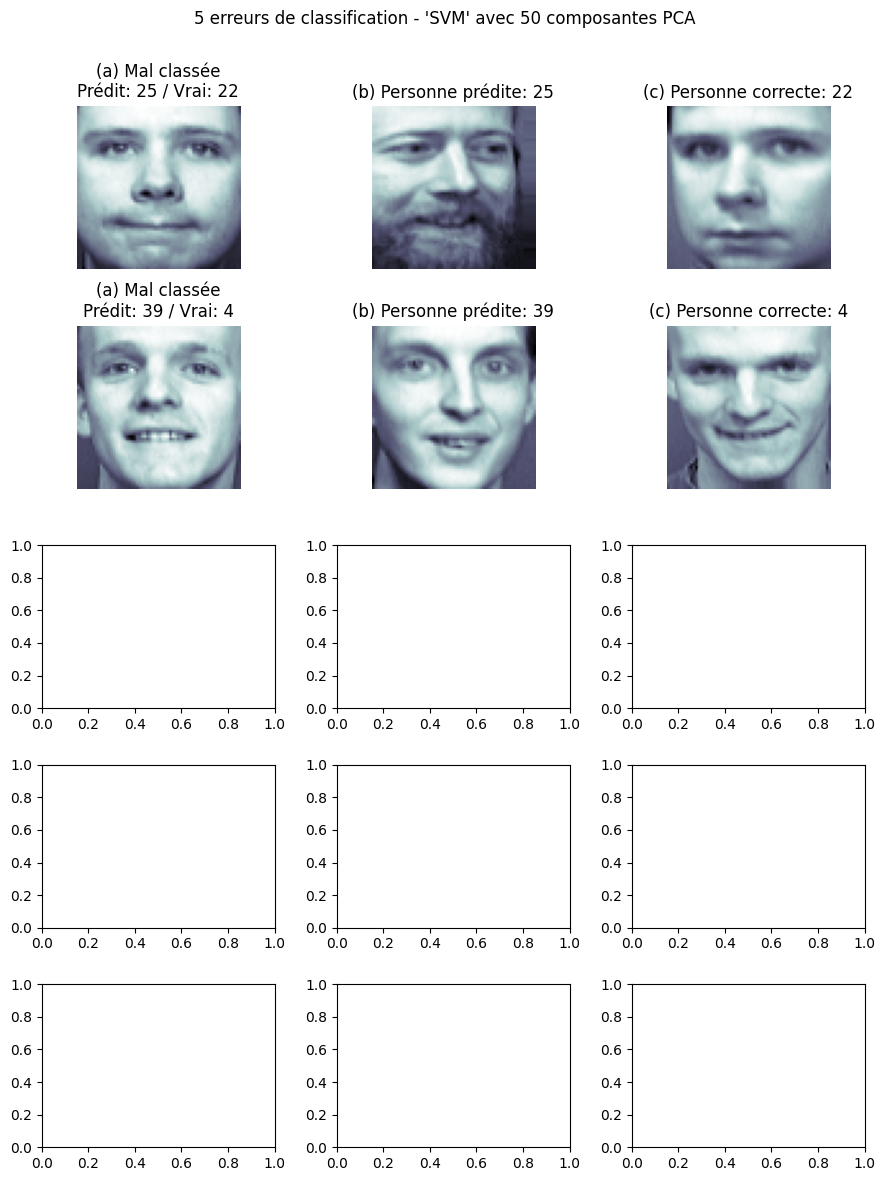

In [20]:
best_featNb = 50
best_clf = classifiers['SVM']["object"]

# PCA fit & transform
pca = decomposition.PCA(n_components=best_featNb, whiten=True)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Entraînement + prédiction
best_clf.fit(x_train_pca, y_train)
y_pred = best_clf.predict(x_test_pca)

# Indices où prédiction != vérité
misclassified_idx = np.where(y_pred != y_test)[0]

fig, axes = plt.subplots(5, 3, figsize=(9, 12))
fig.suptitle(f"5 erreurs de classification - 'SVM' avec {best_featNb} composantes PCA")

for i, idx in enumerate(misclassified_idx[:5]):
    pred_label = y_pred[idx]
    true_label = y_test[idx]

    # (a) Image mal classée
    axes[i, 0].imshow(x_test[idx].reshape(64, 64), cmap=plt.cm.bone)
    axes[i, 0].set_title(f"(a) Mal classée\nPrédit: {pred_label} / Vrai: {true_label}")
    axes[i, 0].axis("off")

    # (b) Une image de la personne prédite
    pred_example = x_train[y_train == pred_label][0]
    axes[i, 1].imshow(pred_example.reshape(64, 64), cmap=plt.cm.bone)
    axes[i, 1].set_title(f"(b) Personne prédite: {pred_label}")
    axes[i, 1].axis("off")

    # (c) Une image correcte de la bonne personne
    true_example = x_train[y_train == true_label][0]
    axes[i, 2].imshow(true_example.reshape(64, 64), cmap=plt.cm.bone)
    axes[i, 2].set_title(f"(c) Personne correcte: {true_label}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


On remarque qu'étant donné que le modèle ne s'est trompé qu'à deux occasions, nous avons 3 rangées de graphiques vides.

Cela dit, on voit tout de même assez clairement qu'il y a une structure assez similaire pour le deuxième cas (39 et 4), il a le haut de la bouche ouverte et des yeux similaires.

Pour le premier cas, il est probable que cela soit la barbe de 25 qui ait induit en erreur le modèle, étant donné les valeurs claires au bas de l'image à classer du 22.

## Tâche 8

In [35]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_rel

# Paramètres du meilleur système
best_pca_features = best_featNb
best_clf = classifiers['SVM']["object"]

# Création des folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_with_pca = []
acc_without_pca = []

for train_idx, test_idx in skf.split(faces.data, faces.target):
    x_train_cv, x_test_cv = faces.data[train_idx], faces.data[test_idx]
    y_train_cv, y_test_cv = faces.target[train_idx], faces.target[test_idx]

    # Sans ACP
    clf_no_pca = best_clf
    clf_no_pca.fit(x_train_cv, y_train_cv)
    acc_no_pca = clf_no_pca.score(x_test_cv, y_test_cv)
    acc_without_pca.append(acc_no_pca)

    # Avec ACP
    pca = decomposition.PCA(n_components=best_pca_features, whiten=True)
    pca.fit(x_train_cv)
    x_train_pca = pca.transform(x_train_cv)
    x_test_pca = pca.transform(x_test_cv)

    clf_pca = best_clf
    clf_pca.fit(x_train_pca, y_train_cv)
    acc_pca = clf_pca.score(x_test_pca, y_test_cv)
    acc_with_pca.append(acc_pca)

# Résultats
print("Accuracies avec ACP:", acc_with_pca)
print("Accuracies sans ACP:", acc_without_pca)

# Test de Student apparié
t_stat, p_value = ttest_rel(acc_with_pca, acc_without_pca)

print(f"\nT-statistique: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("L'amélioration avec ACP est statistiquement significative (p < 0.05)")
else:
    print("Aucune amélioration significative détectée (p >= 0.05)")


Accuracies avec ACP: [0.9375, 0.9875, 0.95, 0.95, 0.9875]
Accuracies sans ACP: [0.975, 0.95, 0.95, 0.9625, 0.9375]

T-statistique: 0.4657
P-value: 0.6657
Aucune amélioration significative détectée (p >= 0.05)
